# Reducing hospital readmissions (The Challenge)

## 📖 Background

This notebook simulates the work of a consulting company helping a hospital group better understand patient readmissions. The hospital gave them access to ten years of information on patients readmitted to the hospital after being discharged. The doctors wanted them to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They wanted to focus follow-up calls and attention on those patients with a higher probability of readmission.

Three main questions were asked, and will be answered throughout the analysis:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

# Diabetes and it's major influence in hospital readmissions


Photo by Pixabay: [source](https://www.pexels.com/photo/bed-empty-equipments-floor-236380/)

## The analysis carried out below reveals that several factors are related to patient readmission rates in hospitals, including age, medical history, healthcare utilization, and medication use. Specifically, the hospital should focus follow-up efforts on patients who have previously been admitted to the hospital, had a longer time in the hospital, had more procedures, were diagnosed with diabetes, or had more outpatient or emergency visits in the year before the hospital stay. Additionally, the analysis shows that ***diabetes is a significant predictor of readmission rates***, highlighting the need for additional resources and support for patients with a diabetes diagnosis.

## 💾 The data
We were given access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### The given variables are described next:
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

## Getting to work

At first, let's take a look in our database to check out for missing values. As we are able to see below, all variables are covered for all twenty-five thousand records. So, we can start awnsering the first question.

In [48]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('data/hospital_readmissions.csv')

# Count the number of records (rows) in the DataFrame
record_count = df.shape[0]

# Print the record count
print("Number of records:", record_count)

Number of records: 25000


In [49]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

Besides there are no missing (null) values in the data, there are a full diagnose cathegory called "Missing", which covers four records in the "diag_1" variable and which will be omitted from the analyses.

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('data/hospital_readmissions.csv')
# Group the data by age bracket and diagnosis and count the number of occurrences in each group
age_group_diagnosis = df.groupby(['diag_1']).size().reset_index(name='counts')
print(age_group_diagnosis)

            diag_1  counts
0      Circulatory    7824
1         Diabetes    1747
2        Digestive    2329
3           Injury    1666
4          Missing       4
5  Musculoskeletal    1252
6            Other    6498
7      Respiratory    3680


## What is the most common primary diagnosis by age group?

The heatmap below provides a detailed breakdown of the number of patients diagnosed with different medical conditions across various age groups. This data allows for a more comprehensive analysis of the prevalence of primary diagnoses within different age brackets.

It is evident that Circulatory diagnoses are the most common across nearly all age brackets. The highest number of Circulatory diagnoses were observed in patients aged between 60-70 and 70-80, with 1962 and 2392 patients respectively. The prevalence of Circulatory diagnoses decreases slightly in the age groups of 80-90 and 90-100, with 1482 and 228 patients respectively.

Other medical conditions also show a varying prevalence across different age groups. For instance, Diabetes diagnoses are more common in patients aged between 40-60 years, with a relatively steep decline in the prevalence of the condition in the age groups of 70-80 and 80-90. In contrast, Respiratory diagnoses show a more gradual increase in prevalence with increasing age, with the highest number of diagnoses observed in patients aged between 70-80 years.

Overall, the data provides a more nuanced understanding of the prevalence of primary diagnoses across different age groups, highlighting the need for targeted interventions and management strategies for specific age-related conditions.


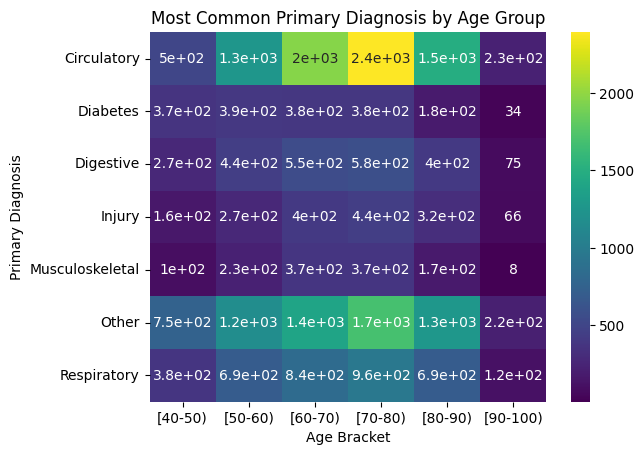

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('data/hospital_readmissions.csv')

# Filter out the rows with the value "missing" in the 'diag_1' column
df = df[df['diag_1'] != 'Missing']

# Group the data by age bracket and diagnosis and count the number of occurrences in each group
age_group_diagnosis = df.groupby(['age', 'diag_1']).size().reset_index(name='counts')

# Pivot the data to create a table with age bracket as the index and diag_1 as the columns
age_group_diagnosis_pivot = age_group_diagnosis.pivot(index='diag_1', columns='age', values='counts')

# Plot the data as a heatmap to visualize the most common primary diagnosis by age bracket
sns.heatmap(age_group_diagnosis_pivot, annot=True, cmap='viridis')
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Most Common Primary Diagnosis by Age Group')
plt.show()

#Print the most common primary diagnosis by age group
#print(age_group_diagnosis_pivot)

# Load the pivot table into a DataFrame
#df = pd.DataFrame(age_group_diagnosis_pivot)

# Get the maximum value for each age bracket
#max_values = df.max(axis=0)
#print("Maximum values for each age bracket:")
#print(max_values)

# Get the most common primary diagnosis for each age bracket
#most_common_diagnosis = df.idxmax(axis=0)
#print("\nMost common primary diagnosis for each age bracket:")
#print(most_common_diagnosis)


## Correlation between variables

The next table is a correlation matrix of all variables from our study. Each value in the matrix represents the correlation coefficient between two variables. A correlation coefficient measures the strength and direction of a linear relationship between two variables, with values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

Looking at the table, some interesting observations can be made. Firstly, there is a moderate positive correlation between the length of hospital stay and the number of medications prescribed (correlation coefficient = 0.45). This suggests that patients who require longer hospital stays tend to have more complex medical conditions that require more medications to manage.

Additionally, there is a weak positive correlation between the length of hospital stay and the number of lab procedures (correlation coefficient = 0.33). This could be due to the fact that patients with more complex medical conditions may require more frequent lab tests during their hospital stay.

Furthermore, there is a weak negative correlation between the number of outpatient visits and the length of hospital stay (correlation coefficient = -0.01). This suggests that patients who visit outpatient facilities more frequently tend to have shorter hospital stays.

Finally, there is a weak positive correlation between diabetes medication and hospital readmission (correlation coefficient = 0.06). This may suggest that patients who are prescribed diabetes medication may be more likely to be readmitted to the hospital, possibly due to the severity of their condition or non-adherence to medication regimens.

In [52]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')

# convert the "readmitted" variable to numeric values
df["readmitted"] = df["readmitted"].map({"yes": 1, "no": 0})

# convert the "diabetes_med" variable to numeric values
df["diabetes_med"] = df["diabetes_med"].map({"yes": 1, "no": 0})

# Measure the correlation between variables
corr_metrics = df.corr()
corr_metrics.style.background_gradient()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,diabetes_med,readmitted
time_in_hospital,1.000000,0.328326,0.179249,0.449415,-0.011309,0.076916,-0.013115,0.064219,0.043141
n_lab_procedures,0.328326,1.000000,0.048827,0.271741,-0.004309,0.043713,-0.004929,0.031342,0.032970
n_procedures,0.179249,0.048827,1.000000,0.368681,-0.034796,-0.069078,-0.042906,-0.010414,-0.044467
n_medications,0.449415,0.271741,0.368681,1.000000,0.043185,0.065572,0.012944,0.195735,0.036871
n_outpatient,-0.011309,-0.004309,-0.034796,0.043185,1.000000,0.127736,0.096912,0.014043,0.095487
n_inpatient,0.076916,0.043713,-0.069078,0.065572,0.127736,1.000000,0.220285,0.020978,0.212480
n_emergency,-0.013115,-0.004929,-0.042906,0.012944,0.096912,0.220285,1.000000,0.017901,0.093519
diabetes_med,0.064219,0.031342,-0.010414,0.195735,0.014043,0.020978,0.017901,1.000000,0.062145
readmitted,0.043141,0.032970,-0.044467,0.036871,0.095487,0.212480,0.093519,0.062145,1.000000


 ## A look into the readmission rates
 
 In order to approach the second question, we can relate the primary diagnosis with age brackets, like we did before, but this time setting the mean readmission value for each diagnosis/age bracket combination.
 
 It is easy to see that the readmission rates tend to increase as patients get older, with the highest rates being seen in the 70-80 and 80-90 age brackets.

There is also some variation in the readmission rates depending on the diagnosis. Diabetes patients tend to have higher readmission rates than patients with other diagnoses, while patients with musculoskeletal diagnoses tend to have lower readmission rates than patients with other diagnoses.

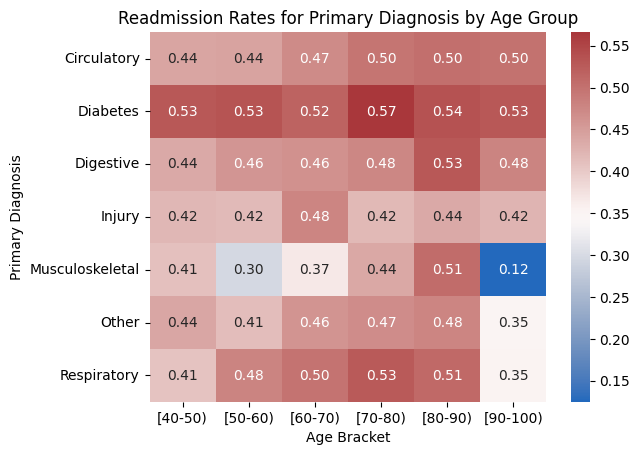

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load the data
data = pd.read_csv('data/hospital_readmissions.csv')

# Filter out the rows with the value "missing" in the 'diag_1' column
data = data[data['diag_1'] != 'Missing']

# convert the "readmitted" variable to numeric values
data["readmitted"] = data["readmitted"].map({"yes": 1, "no": 0})

# create a pivot table of diabetes diagnosis and readmission rates by age group and diagnosis
table = pd.pivot_table(data, values="readmitted", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Readmission Rates for Primary Diagnosis by Age Group')
plt.show()


## The Chi-Squared Analysis

For readers who may not be familiar with the term:

Chi-Squared (χ²) analysis is a statistical method that evaluates the relationship between two categorical variables. It helps to determine whether there is a significant association or correlation between the two variables.

The basic idea behind Chi-Squared analysis is to compare the observed data with the expected data under the assumption of no association between the variables. If the observed data differs significantly from the expected data, then we reject the null hypothesis (the assumption of no association) and conclude that there is a significant association between the variables.

Chi-Squared analysis is commonly used in hypothesis testing, where it is used to determine if there is a significant difference between the observed and expected data. For example, in medical research, Chi-Squared analysis can be used to test whether there is a significant association between a certain disease and a specific risk factor.

The significance of Chi-Squared analysis lies in its ability to provide a quantitative measure of the strength of the association between two categorical variables. By calculating a Chi-Squared value and comparing it to a critical value from a Chi-Squared distribution, we can determine whether the association is statistically significant or not. This allows researchers to draw valid conclusions about the relationship between variables and make informed decisions based on the results.

A deeper look into our variables relationships can show that Diabetes diagnoses are directly related to higher readmission rates, not only visualy.

Performing a Chi-Squared test between Diabetes diagnosis and Readmission counts we can see that the differences in readmission rates between patients with and without diabetes are quite striking. 

There's a significant association between diabetes status and readmission status, as indicated by the chi-square test results. 
The p-value being less than the significance level of 0.05 tells us that there is a low probability of the association being due to chance. 

As a result, we can confidently reject the null hypothesis and conclude that there is indeed evidence to suggest that diabetes status and readmission status are associated.

The analysis performed shows that patients with diabetes have a higher readmission rate compared to those without diabetes. 

Readmission rate for patients with diabetes: 0.536
Readmission rate for patients without diabetes: 0.465


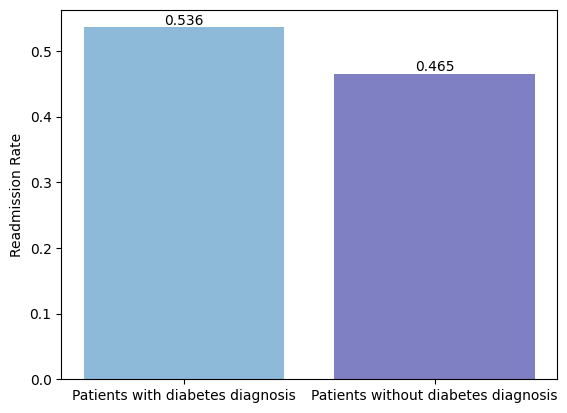

Chi-square test results:
Chi-square statistic: 32.74600493765014
P-value: 1.0502193040609367e-08
Degrees of freedom: 1
Expected values: [[12320.36952 10932.63048]
 [  925.63048   821.36952]]
The p-value is less than the significance level of 0.05
We can reject the null hypothesis that there is no association between diabetes status and readmission status.
There is evidence to suggest that diabetes status and readmission status are associated.


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from a CSV file
data = pd.read_csv('data/hospital_readmissions.csv')

# Create a new column indicating whether the patient has a diabetes diagnosis
data['has_diabetes'] = data['diag_1'].str.startswith('Diabetes')

# Group the data by diabetes status and readmission status, and count the number of occurrences
readmission_counts = data.groupby(['has_diabetes', 'readmitted'])['readmitted'].count()

# Calculate the readmission rate for patients with and without diabetes
diabetes_readmission_rate = readmission_counts[True]['yes'] / readmission_counts[True].sum()
non_diabetes_readmission_rate = readmission_counts[False]['yes'] / readmission_counts[False].sum()

# Print the readmission rates
print("Readmission rate for patients with diabetes:", round(diabetes_readmission_rate,3))
print("Readmission rate for patients without diabetes:", round(non_diabetes_readmission_rate,3))

# Plot the readmission rates by diabetes status
fig, ax = plt.subplots()
x_labels = ['Patients with diabetes diagnosis', 'Patients without diabetes diagnosis']
y_values = [round(diabetes_readmission_rate,3), round(non_diabetes_readmission_rate,3)]
colors = ['tab:blue', 'darkblue'] # specify colors for the bars
alphas = [0.8, 0.5] # specify opacity values for the bars
bar = ax.bar(x_labels, y_values, color=colors, alpha=0.5)
ax.set_ylabel('Readmission Rate')
# adding the data labels to the bars
for i, rect in enumerate(bar):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, str(height), ha='center', va='bottom')
plt.show()

from scipy.stats import chi2_contingency

# Create a contingency table of diabetes status vs. readmission status
contingency_table = pd.crosstab(data['has_diabetes'], data['readmitted'])

# Perform chi-square test and print results
chi2, pval, dof, expected = chi2_contingency(contingency_table)
print('Chi-square test results:')
print('Chi-square statistic:', chi2)
print('P-value:', pval)
print('Degrees of freedom:', dof)
print('Expected values:', expected)

# Set the significance level for the test
alpha = 0.05

# Check if we can reject the null hypothesis
if pval < alpha:
    print('The p-value is less than the significance level of', alpha)
    print('We can reject the null hypothesis that there is no association between diabetes status and readmission status.')
    print('There is evidence to suggest that diabetes status and readmission status are associated.')
else:
    print('The p-value is greater than or equal to the significance level of', alpha)
    print('We fail to reject the null hypothesis that there is no association between diabetes status and readmission status.')
    print('There is not enough evidence to suggest that diabetes status and readmission status are associated.')




## Correlation to other variables
Looking at other variables that may be significantly correlated to the Diabetes Diagnosis: time spent in the hospital, number of lab procedures, number of medical procedures, number of outpatient visits, number of inpatient visits, and number of emergency room visits. Upon visual inspection, only the number of medical procedures and the number of lab procedures appeared to lack a correlation with diabetes diagnosis. While all the other variables seem to have a strong correlation to the Diabetes Diagnosis.

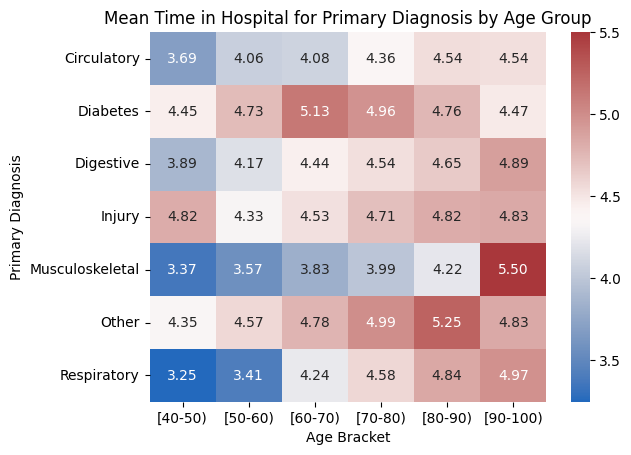

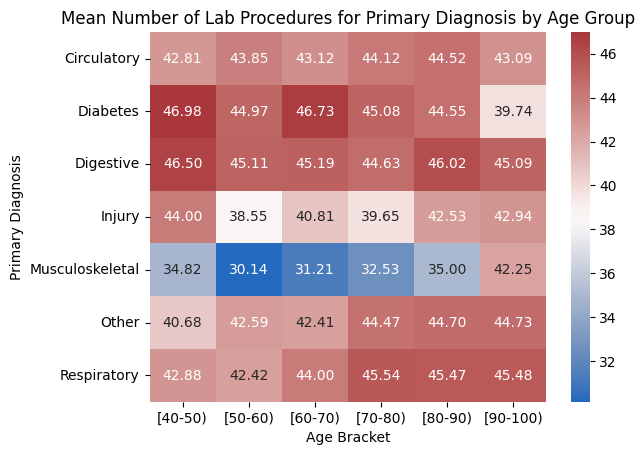

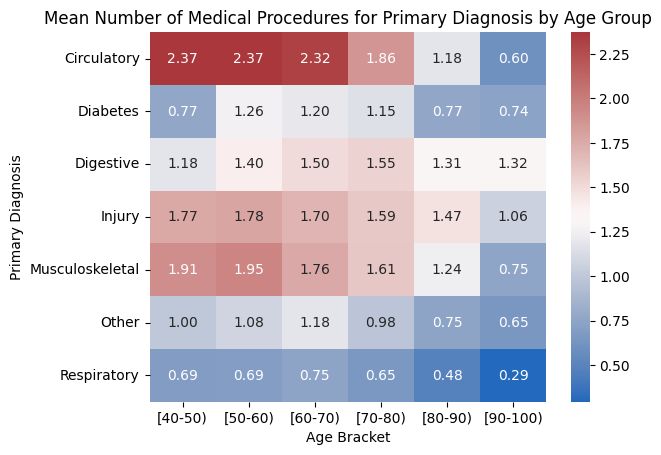

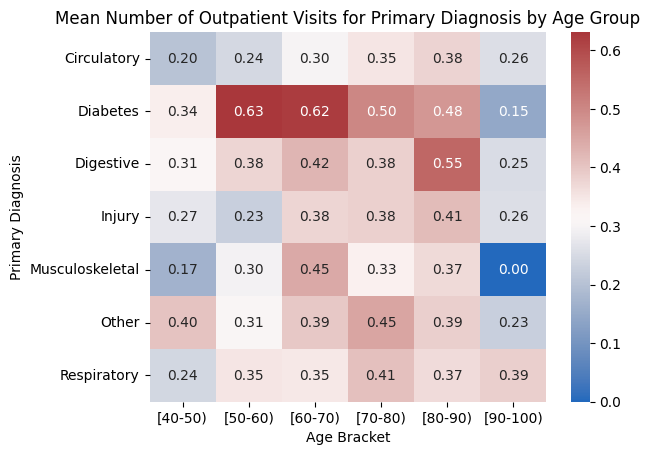

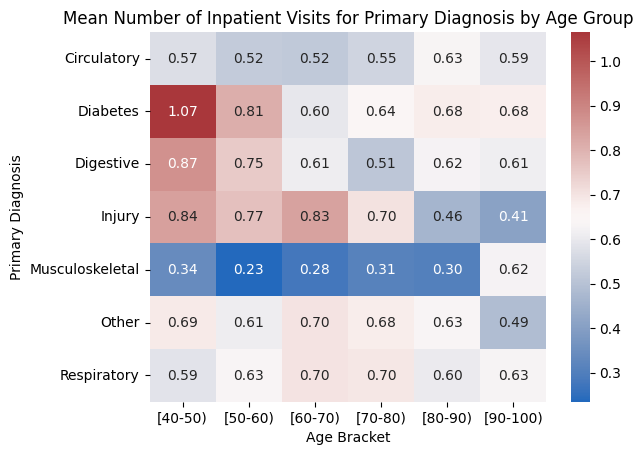

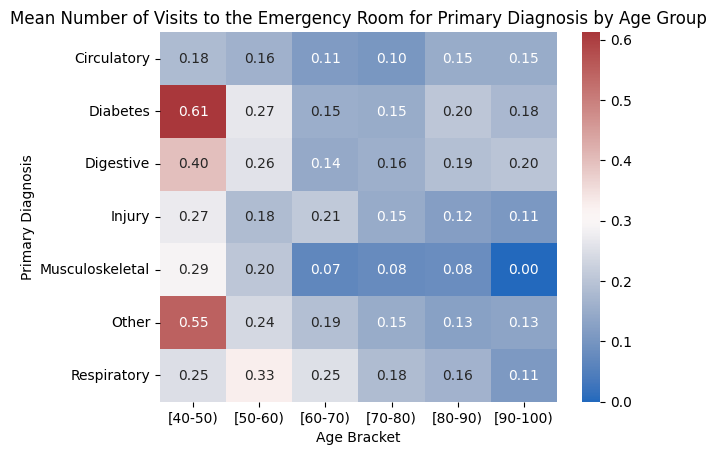

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load the data
data = pd.read_csv('data/hospital_readmissions.csv')

# Filter out the rows with the value "missing" in the 'diag_1' column
data = data[data['diag_1'] != 'Missing']

# create a pivot table of mean time in hospital by age group and diagnosis
table = pd.pivot_table(data, values="time_in_hospital", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Mean Time in Hospital for Primary Diagnosis by Age Group')
plt.show()

# create a pivot table of mean number of lab procedures by age group and diagnosis
table = pd.pivot_table(data, values="n_lab_procedures", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Mean Number of Lab Procedures for Primary Diagnosis by Age Group')
plt.show()

# create a pivot table of mean number of medical procedures by age group and diagnosis
table = pd.pivot_table(data, values="n_procedures", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Mean Number of Medical Procedures for Primary Diagnosis by Age Group')
plt.show()

# create a pivot table of mean number of outpatient visits by age group and diagnosis
table = pd.pivot_table(data, values="n_outpatient", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Mean Number of Outpatient Visits for Primary Diagnosis by Age Group')
plt.show()

# create a pivot table of mean number of inpatient visits by age group and diagnosis
table = pd.pivot_table(data, values="n_inpatient", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Mean Number of Inpatient Visits for Primary Diagnosis by Age Group')
plt.show()

# create a pivot table of mean number of emergency room visits by age group and diagnosis
table = pd.pivot_table(data, values="n_emergency", index="diag_1", columns="age", aggfunc="mean")
#print(table)

# plot the heatmap
sns.heatmap(table, cmap="vlag", annot=True, fmt=".2f")
plt.xlabel('Age Bracket')
plt.ylabel('Primary Diagnosis')
plt.title('Mean Number of Visits to the Emergency Room for Primary Diagnosis by Age Group')
plt.show()


## Diabetic patients

Among the 25,000 patient records in the database, 76.9% were prescribed medication for diabetes. This suggests that the majority of patients had already been diagnosed with diabetes prior to their visit, as they would not have been prescribed medication otherwise. It is worth noting that some patients may have received medication for diabetes despite having other diagnoses.

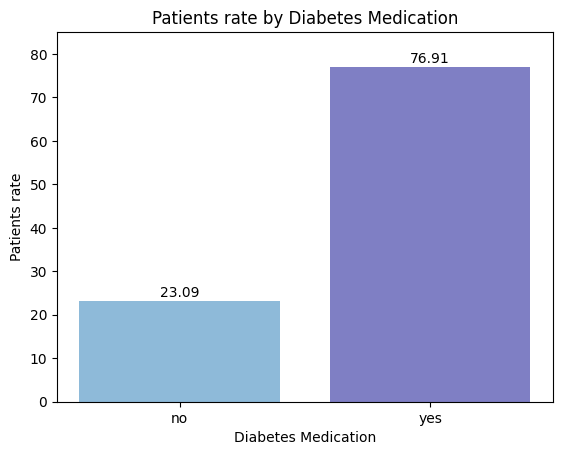

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas dataframe
df = pd.read_csv('data/hospital_readmissions.csv')

# Get the frequency of patients who received diabetes medicatiom from all ages

df_grouped1 = df.groupby(['diabetes_med']).size().reset_index(name='counts')
df_grouped1['rate'] = round((df_grouped1['counts']/df_grouped1['counts'].sum()*100),2)
#print(df_grouped1)

# Create a bar chart
fig, ax = plt.subplots()
colors = ['tab:blue', 'darkblue'] # specify colors for the bars
ax.bar(df_grouped1['diabetes_med'], df_grouped1['rate'], color=colors, alpha=0.5)

# Set the axis labels and title
ax.set_xlabel('Diabetes Medication')
ax.set_ylabel('Patients rate')
ax.set_title('Patients rate by Diabetes Medication')

# Add data labels to the bars
for i, v in enumerate(df_grouped1['rate']):
    ax.text(i, v+1, str(v), ha='center')
    
# Set scale
ax.set_ylim(0,85)

# Display the plot
plt.show()

Looking at the readmission rates for these patients, we can easily see that diabetes plays a major role in readmissions, as nearly 80% of diabetic patients were readmitted to the hospital. This correlation is statistically significant, as confirmed by the Chi-Squared analysis.

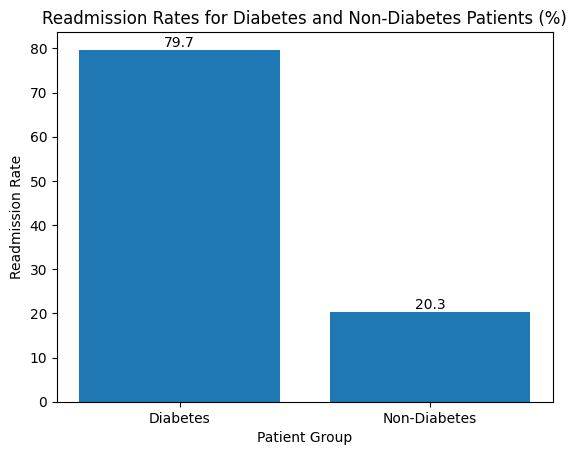

Chi-Squared Test Results:
Chi-Squared Statistic: 96.55089070174321
p-value: 5.331765385219338e-20
Degree of Freedom: 4
Reject the null hypothesis. There is a significant difference in readmission rates between patients with and without diabetes diagnosis.


In [57]:
import pandas as pd
import scipy.stats as stats

# Load the data into a pandas dataframe
df = pd.read_csv('data/hospital_readmissions.csv')

# Get the count of patients diagnosed with diabetes
diabetes_patients = df[df["diabetes_med"] == "yes"]["readmitted"].value_counts().get("yes", 0)
#print(diabetes_patients)

# Get the count of patients without diabetes
non_diabetes_patients = df[df["diabetes_med"] == "no"]["readmitted"].value_counts().get('yes', 0)
#print(non_diabetes_patients)

# Calculate the readmission rate for patients diagnosed with diabetes
diabetes_readmission_rate = round(diabetes_patients / (diabetes_patients + non_diabetes_patients)*100,1)

# Calculate the readmission rate for patients without diabetes
non_diabetes_readmission_rate = round(non_diabetes_patients / (diabetes_patients + non_diabetes_patients)*100,1)

# Print the results
#print("Diabetes Readmission Rate:", diabetes_readmission_rate)
#print("Non-Diabetes Readmission Rate:", non_diabetes_readmission_rate)

#Plot the results
import matplotlib.pyplot as plt

#Set the bar plot
bar = plt.bar(["Diabetes", "Non-Diabetes"], [diabetes_readmission_rate, non_diabetes_readmission_rate])

# adding the data labels to the bars
for i, rect in enumerate(bar):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, str(height), ha='center', va='bottom')

#Add labels and title to the plot
plt.xlabel("Patient Group")
plt.ylabel("Readmission Rate")
plt.title("Readmission Rates for Diabetes and Non-Diabetes Patients (%)")
    
#Show the plot
plt.show()

# Create a contingency table to store the count of patients with diabetes diagnosis and readmission
table = pd.crosstab(df['diabetes_med'], df['readmitted'], margins=True)

# Calculate the expected values for each cell
expected_values = stats.contingency.expected_freq(table)

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(table)

# Print the test results
print("Chi-Squared Test Results:")
print("Chi-Squared Statistic:", chi2)
print("p-value:", p)
print("Degree of Freedom:", dof)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in readmission rates between patients with and without diabetes diagnosis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in readmission rates between patients with and without diabetes diagnosis.")


Diabetic patients also spent more time in hospital in comparison to other patients.

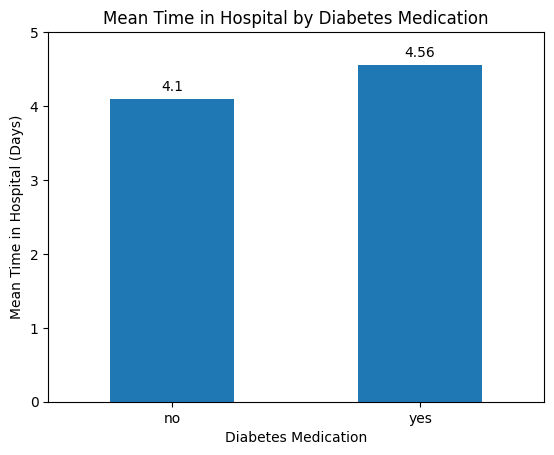

Chi-Squared Test Results:
Chi-Squared Statistic: 185.5581898377697
p-value: 3.5794966838131683e-25
Degree of Freedom: 28
Reject the null hypothesis. There is a significant difference in time spent in hospital between patients with and without diabetes diagnosis.


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the database into a pandas dataframe
df = pd.read_csv("data/hospital_readmissions.csv")

# Group the data by the "diabetes_med" column and calculate the mean "time_in_hospital" for each group
grouped = round(df.groupby("diabetes_med")["time_in_hospital"].mean(),2)

# Plot the results
ax = grouped.plot(kind="bar")
plt.xlabel("Diabetes Medication")
plt.ylabel("Mean Time in Hospital (Days)")
plt.title("Mean Time in Hospital by Diabetes Medication")
plt.xticks(rotation=0)

# Add the labels on top of the bars
for i, v in enumerate(grouped):
    ax.text(i, v + 0.1, str(v), ha='center')

# Set the y-axis limit to 5
plt.ylim(0, 5)
plt.show()

# Create a contingency table to store the count of patients with diabetes diagnosis and readmission
table = pd.crosstab(df['diabetes_med'], df["time_in_hospital"], margins=True)

# Calculate the expected values for each cell
expected_values = stats.contingency.expected_freq(table)

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(table)

# Print the test results
print("Chi-Squared Test Results:")
print("Chi-Squared Statistic:", chi2)
print("p-value:", p)
print("Degree of Freedom:", dof)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in time spent in hospital between patients with and without diabetes diagnosis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in time spent in hospital between patients with and without diabetes diagnosis.")




Diabetic patients had also been prescribed more medications than other patients.

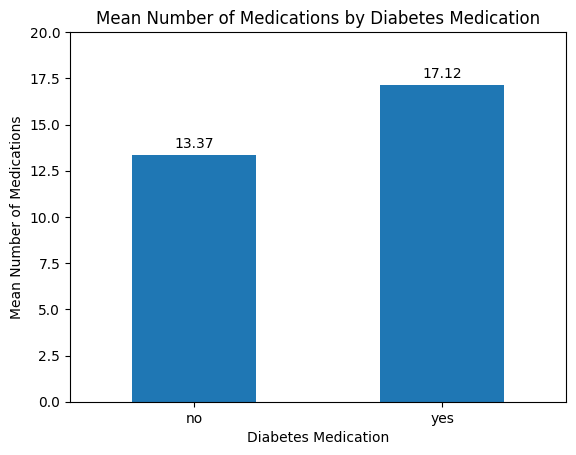

Chi-Squared Test Results:
Chi-Squared Statistic: 1453.6913544849053
p-value: 3.840501892332873e-217
Degree of Freedom: 140
Reject the null hypothesis. There is a significant difference in number of medications between patients with and without diabetes diagnosis.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the database into a pandas dataframe
df = pd.read_csv("data/hospital_readmissions.csv")

# Group the data by the "diabetes_med" column and calculate the mean "n_procedures" for each group
grouped = df.groupby("diabetes_med")["n_medications"].mean()

# Plot the results
ax = grouped.plot(kind="bar")
plt.xlabel("Diabetes Medication")
plt.ylabel("Mean Number of Medications")
plt.title("Mean Number of Medications by Diabetes Medication")
plt.xticks(rotation=0)

# Add the labels on top of the bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Set the y-axis limit to 5
plt.ylim(0, 20)
plt.show()

# Create a contingency table to store the count of patients with diabetes diagnosis and readmission
table = pd.crosstab(df['diabetes_med'], df["n_medications"], margins=True)

# Calculate the expected values for each cell
expected_values = stats.contingency.expected_freq(table)

# Perform the chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(table)

# Print the test results
print("Chi-Squared Test Results:")
print("Chi-Squared Statistic:", chi2)
print("p-value:", p)
print("Degree of Freedom:", dof)

# Interpret the results
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in number of medications between patients with and without diabetes diagnosis.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in number of medications between patients with and without diabetes diagnosis.")

Based on the data, we can infer that diabetic patients not only have higher readmission rates but also consume more time and resources from the hospital system. This may contribute to the rise in medical expenses and costs. Therefore, it is crucial to focus on reducing the readmission rates of diabetic patients to minimize the financial burden on the healthcare system.

## Sensibility Analysis

Additionally, a Sensibility Analysis was carried out in order to find more groups with high readmission rates.

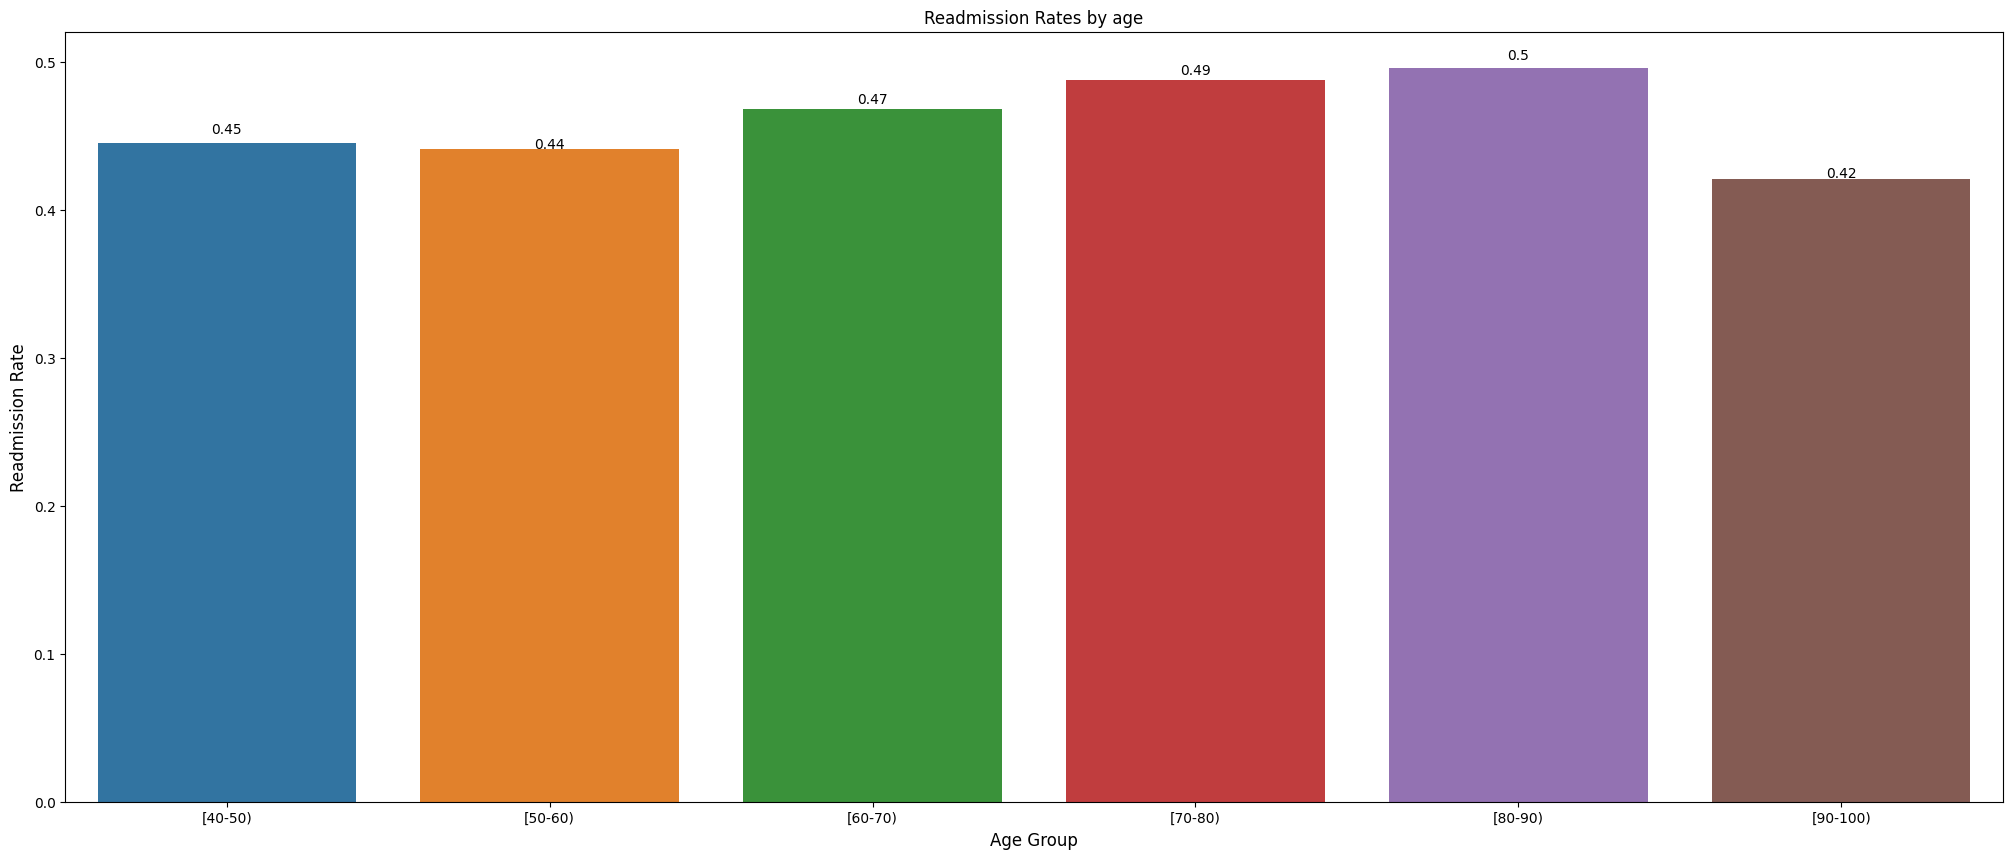

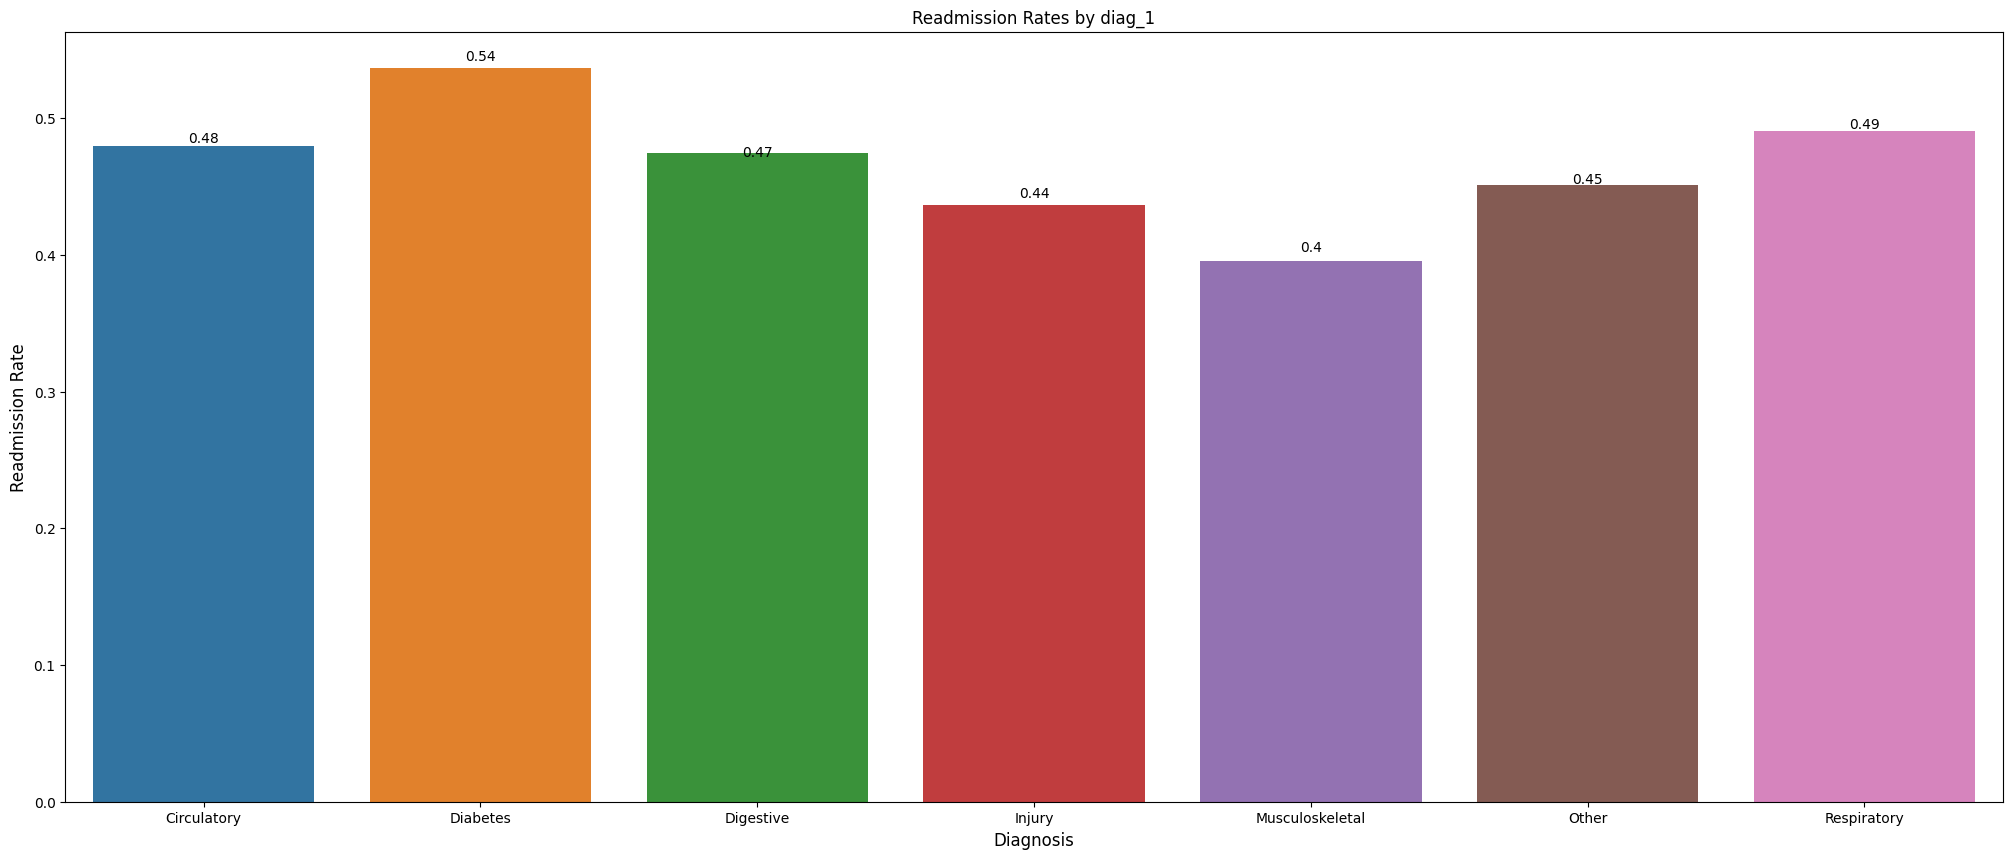

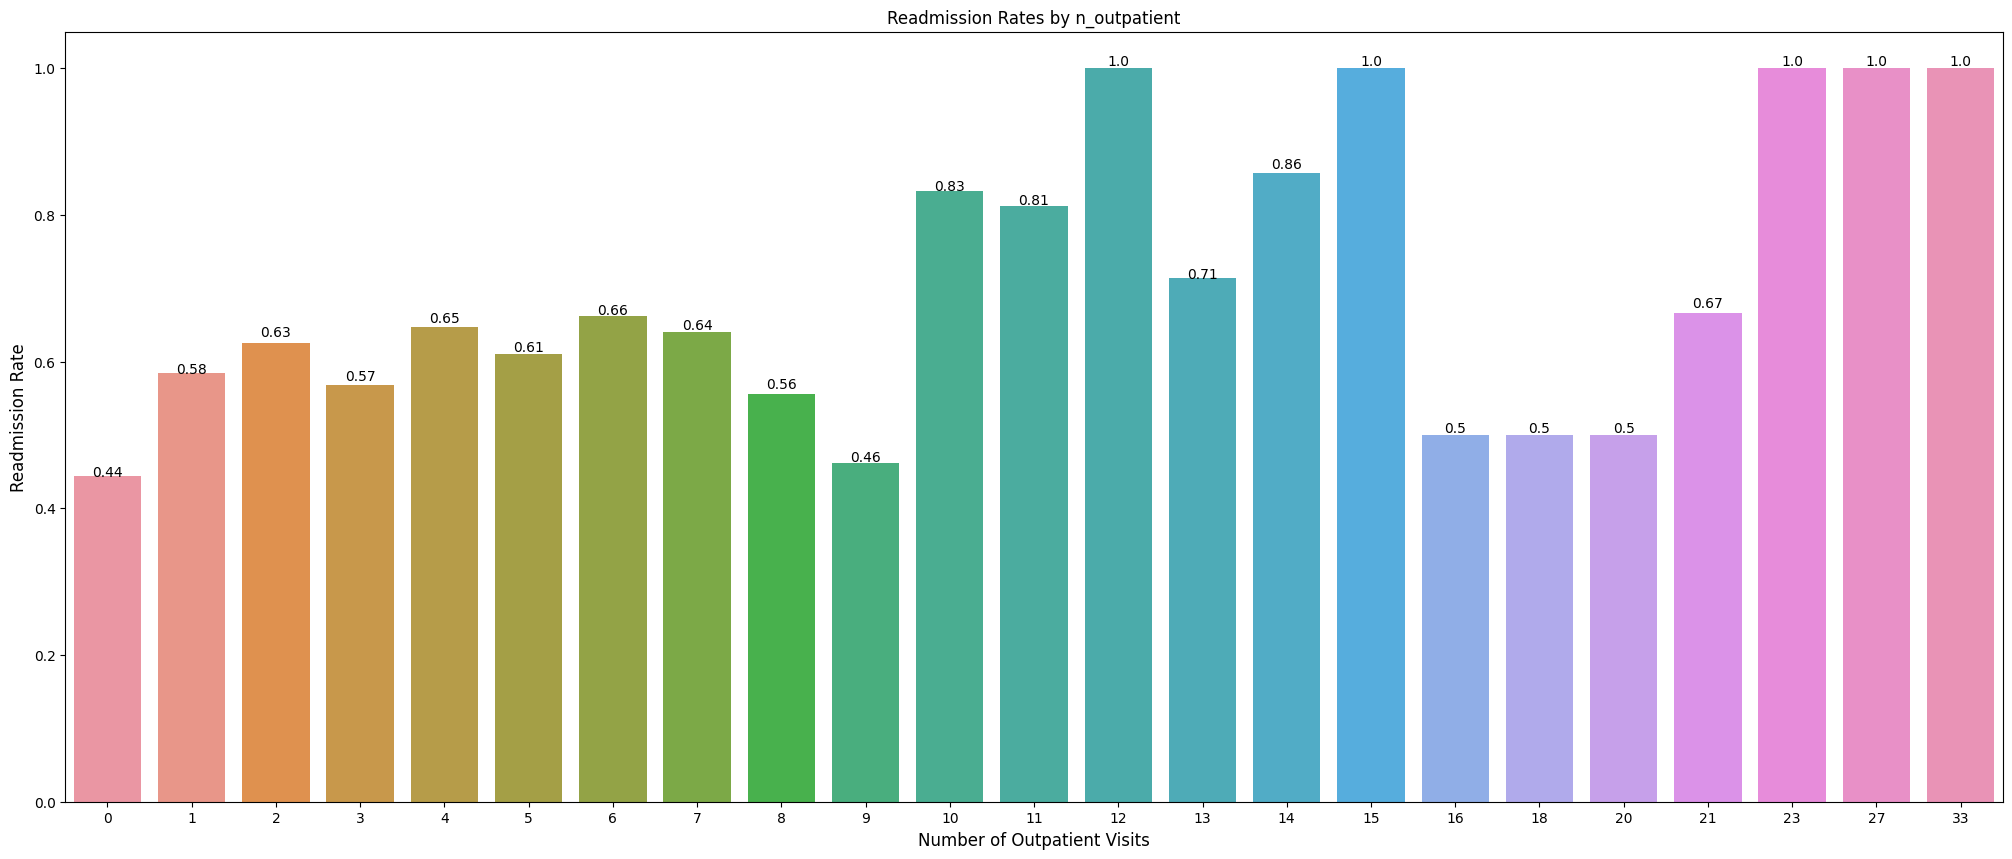

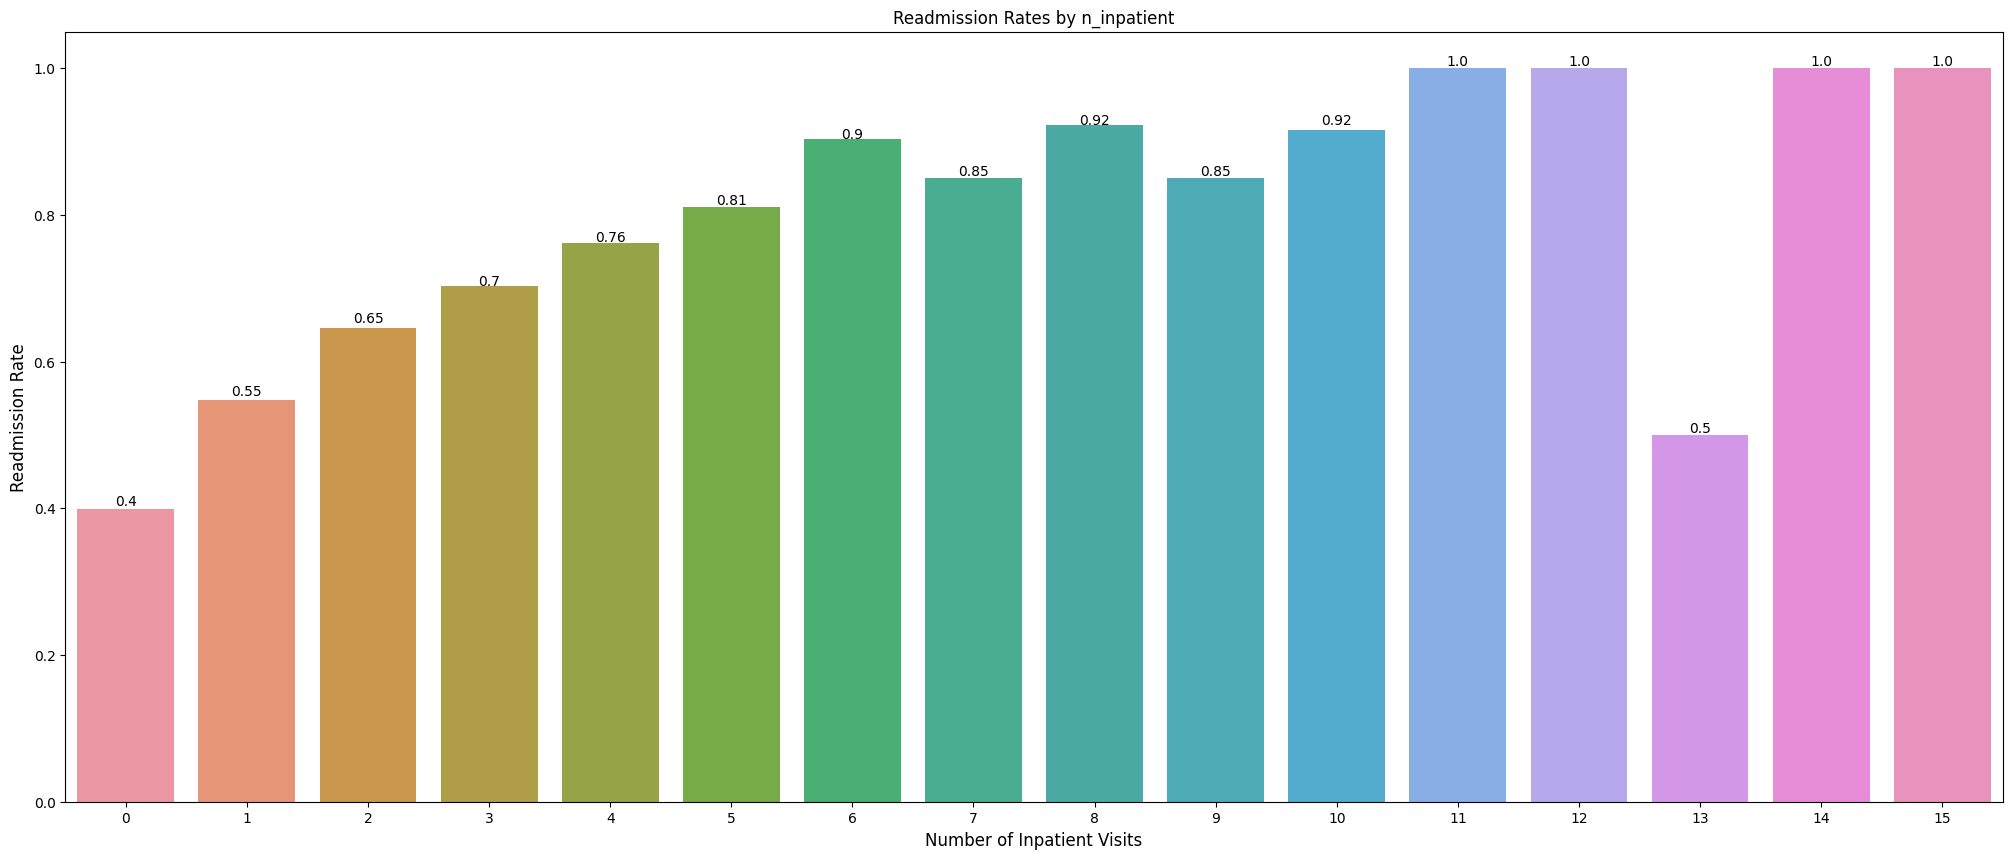

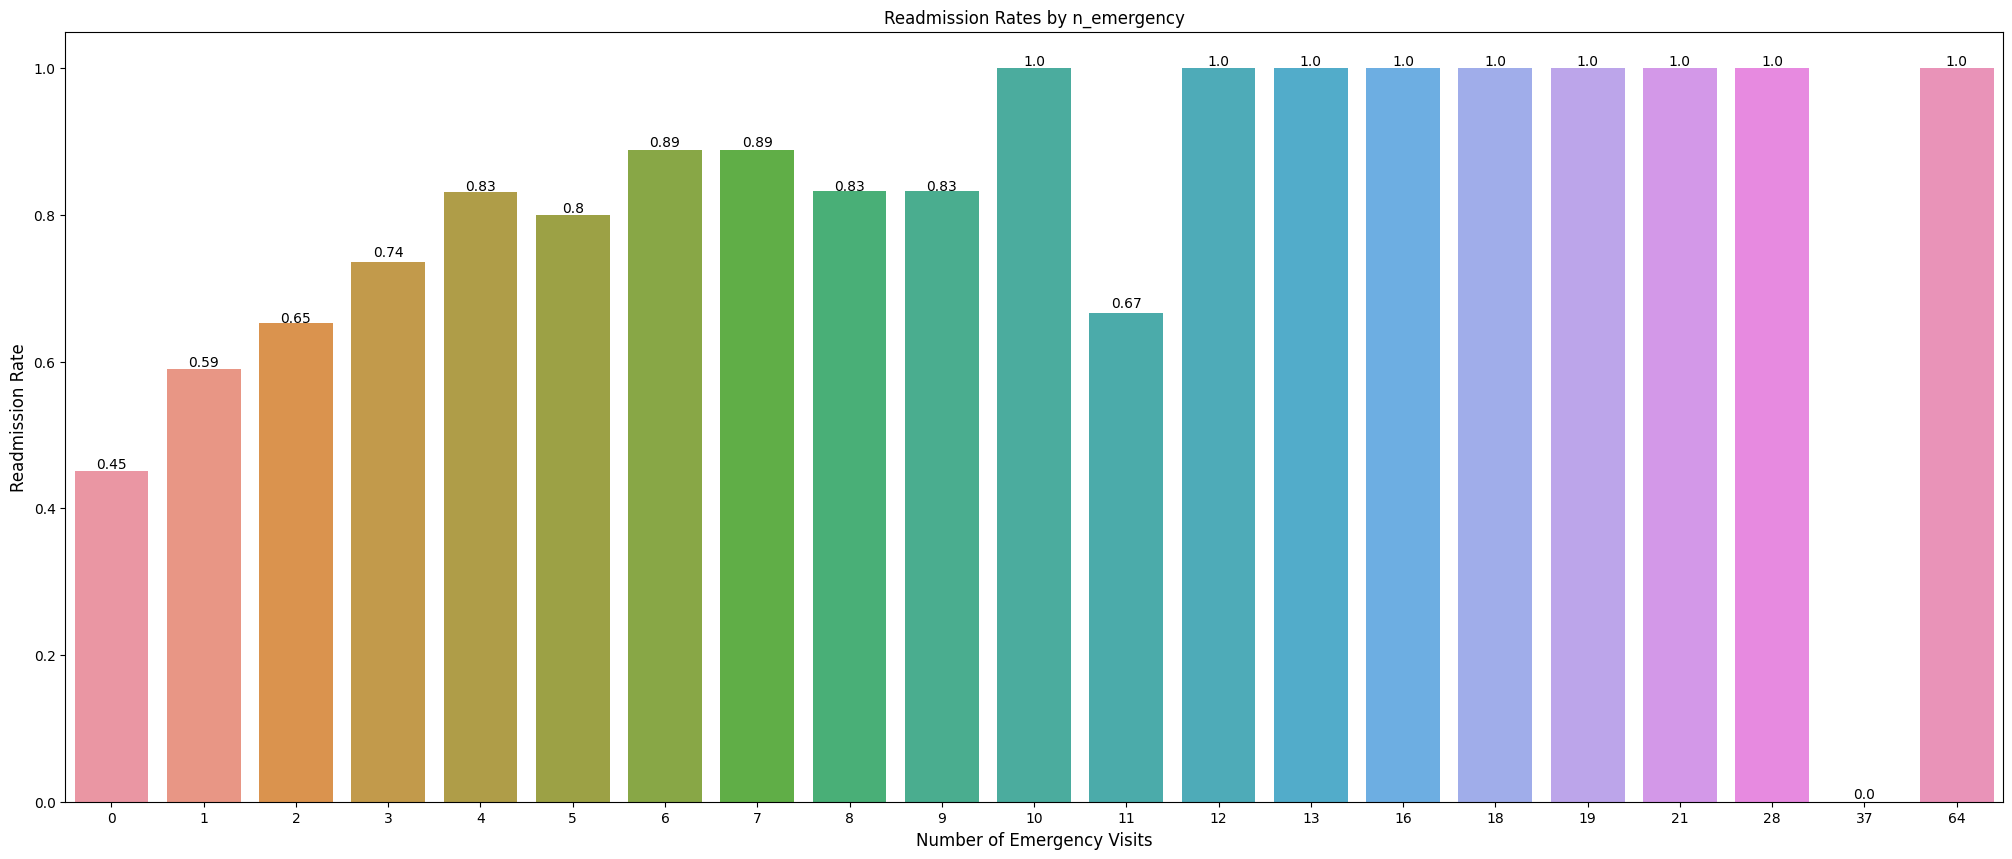

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/hospital_readmissions.csv")

# Filter out the rows with the value "missing" in the 'diag_1', 'diag_2' and 'diag_3' columns
df = df[df['diag_1'] != 'Missing']

# Define the features to be used in the analysis
features = ["age", "diag_1", "n_outpatient", "n_inpatient", "n_emergency"]

# Perform the sensitivity analysis for each feature
for feature in features:
    # Create a cross-tabulation table between the feature and the readmission status
    table = pd.crosstab(df[feature], df["readmitted"])
    
    # Check that the table is not empty before proceeding
    if not table.empty:
        # Calculate the proportion of readmitted patients in each group
        table["readmission_rate"] = table["yes"] / (table["yes"] + table["no"])
        #table = table.sort_values(by="readmission_rate",ascending=False)
        #print(table)
       
        # Plot the results
        plt.figure(figsize=(25, 10))
        sns.barplot(x=table.index, y="readmission_rate", data=table)
        plt.title(f"Readmission Rates by {feature}")
        plt.ylabel("Readmission Rate", fontsize=12)
        if feature == "age":
            plt.xlabel("Age Group", fontsize=12)
        elif feature == "diag_1":
            plt.xlabel("Diagnosis", fontsize=12)
        elif feature == "n_lab_procedures":
            plt.xlabel("Number of Lab Procedures", fontsize=12)
        elif feature == "n_procedures":
            plt.xlabel("Number of Medical Procedures", fontsize=12)
        elif feature == "n_medications":
            plt.xlabel("Number of Medications Prescribed", fontsize=12)
        elif feature == "n_outpatient":
            plt.xlabel("Number of Outpatient Visits", fontsize=12)
        elif feature == "n_inpatient":
            plt.xlabel("Number of Inpatient Visits", fontsize=12)
        elif feature == "n_emergency":
            plt.xlabel("Number of Emergency Visits", fontsize=12)
        elif feature == "medical_specialty":
            plt.xlabel("Medical Speciality", fontsize=12)
        elif feature == "glucose_test":
            plt.xlabel("Glucose Test Result", fontsize=12)
        elif feature == "A1Ctest":
            plt.xlabel("A1C Test Result", fontsize=12)
        else:
            plt.xlabel("Time in Hospital", fontsize=12)    
        
        for i, v in enumerate(table["readmission_rate"].round(2)):
            plt.text(i, v, str(v), color='black', va='bottom', ha='center', fontweight='normal')
        plt.show()



From this analysis it's possible to infer that the groups that had higher readmission rates are:

Patients with more than 10 Outpatient visits, as they had a readmission rate of 100% or close to it.
Patients with more than 8 Inpatient visits, as almost all had a readmission rate of 100%.
Patients with more than 10 Emergency visits, as they had a readmission rate of 100% or close to it.

Additionally, the following groups also had higher readmission rates compared to others:

Patients with a primary diagnosis of Diabetes had the highest readmission rate of 53.6%.
Patients with a primary diagnosis of Respiratory, Circulatory, and Digestive diseases also had high readmission rates of around 49% to 47%.
Patients in the age groups of 80-90 and 70-80 had the highest readmission rates among all age groups, with rates of 49.6% and 48.8%, respectively.

## Conclusion

Therefore, these groups should receive more attention and care to avoid readmissions. For example, patients with high numbers of outpatient visits or emergency department visits may benefit from improved management of their chronic conditions, and older patients may benefit from more personalized care plans to address their specific needs and risks. Additionally, patients with primary diagnoses of Diabetes, Respiratory, Circulatory, and Digestive diseases may benefit from more intensive disease management and education to reduce the risk of readmissions.

## Thank you for taking the time to read this article! If you found it enjoyable or informative, please consider giving it an upvote. Thank you again for your support!
![hospital-gbb6937447_1920](hospital-gbb6937447_1920.jpg)
Image by <a href="https://pixabay.com/users/jamesronin-10522531/?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=6139216">JR</a> from <a href="https://pixabay.com//?utm_source=link-attribution&amp;utm_medium=referral&amp;utm_campaign=image&amp;utm_content=6139216">Pixabay</a>